Import the data

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps
from intersections import intersections, lines, line_segments
from hexgrid_boundary import columbus_hexagons as hexagon

Plot the cell and the intersecting segments

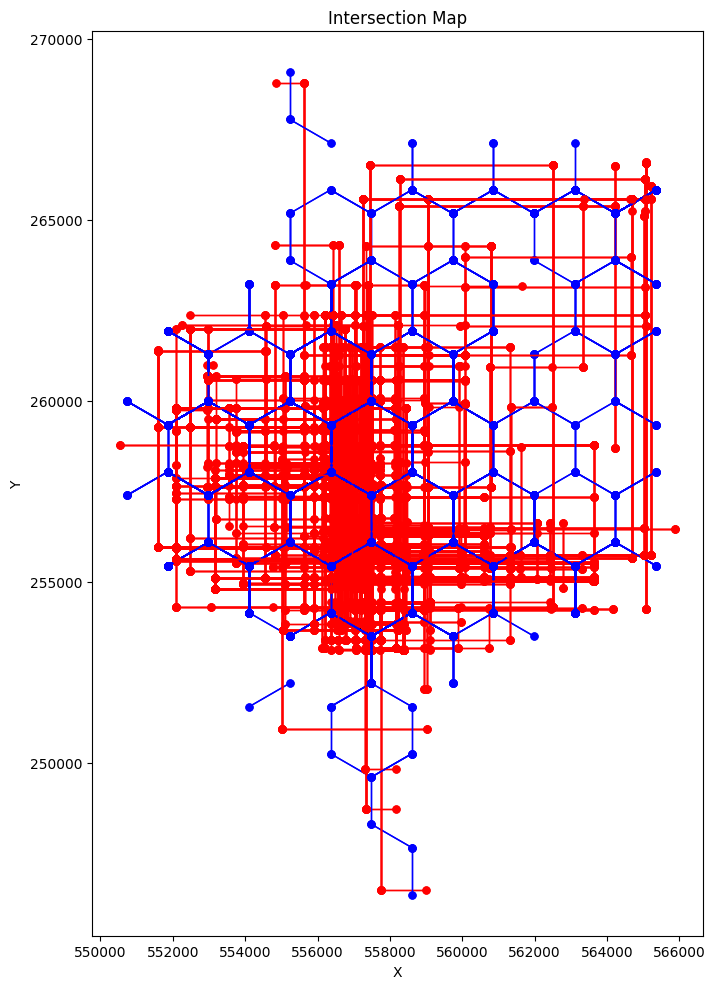

In [2]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the intersections
for intersection in intersections:
    p1, q1, p2, q2 = intersection
    ax.plot([p1[0], q1[0]], [p1[1], q1[1]], 'r-', linewidth=1)
    ax.plot([p2[0], q2[0]], [p2[1], q2[1]], 'b-', linewidth=1)
    ax.plot(p1[0], p1[1], 'ro', markersize=5)
    ax.plot(q1[0], q1[1], 'ro', markersize=5)
    ax.plot(p2[0], p2[1], 'bo', markersize=5)
    ax.plot(q2[0], q2[1], 'bo', markersize=5)

# Set the title and axis labels
ax.set_title('Intersection Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set equal aspect ratio
ax.set_aspect('equal')

# Display the plot
plt.tight_layout()
plt.show()

Calculate averages

In [3]:
# Calculate the total number of intersections
total_intersections = len(intersections)

#count the hexagons
hex_count = 0
for hex in hexagon:
    hex_count += 1

#calculate the average intersections per hexagin
avg_hex_intersections = total_intersections / hex_count

#print
print(f"Number of Intersections: {total_intersections}")
print(f"Number of Hexagons: {hex_count}")
print(f"Average number of Hexagon intersections: {avg_hex_intersections}")

# Count the number of lines
lines_count = len(lines)

# Calculate the average number of intersections per line
avg_line_intersections = total_intersections / lines_count

#print
print(f"Number of Lines: {lines_count}")
print(f"Average number of Line intersections: {avg_line_intersections}")

seg_count = 0
for segment in line_segments:
    seg_count += 1

#calculate the average intersections per hexagin
avg_seg_intersections = total_intersections / seg_count

#print
print(f"Number of Segments: {seg_count}")
print(f"Average number of Segment intersections: {avg_seg_intersections}")

Number of Intersections: 11430
Number of Hexagons: 224
Average number of Hexagon intersections: 51.026785714285715
Number of Lines: 5238
Average number of Line intersections: 2.1821305841924397
Number of Segments: 2346624
Average number of Segment intersections: 0.004870827196858125


In [6]:
# Initialize a dictionary to count intersections for each hexagon segment
hex_segment_intersections = {}

# Iterate over each hexagon
for hex_coords in columbus_hexagons:
    hex_coords.append(hex_coords[0])  # Close the polygon
    for i in range(len(hex_coords) - 1):
        segment = (tuple(hex_coords[i]), tuple(hex_coords[i + 1]))
        reverse_segment = (tuple(hex_coords[i + 1]), tuple(hex_coords[i]))
        if segment not in hex_segment_intersections and reverse_segment not in hex_segment_intersections:
            hex_segment_intersections[segment] = 0

        # Count intersections for this segment
        for inter in intersections:
            if segment == (inter[0], inter[1]) or segment == (inter[1], inter[0]) or \
               segment == (inter[2], inter[3]) or segment == (inter[3], inter[2]) or \
               reverse_segment == (inter[0], inter[1]) or reverse_segment == (inter[1], inter[0]) or \
               reverse_segment == (inter[2], inter[3]) or reverse_segment == (inter[3], inter[2]):
                hex_segment_intersections[segment] += 1

# Get the maximum number of intersections
max_intersections = max(hex_segment_intersections.values(), default=0)

# Print the result for debugging
print(f"Max intersections for a hexagon segment: {max_intersections}")

NameError: name 'columbus_hexagons' is not defined

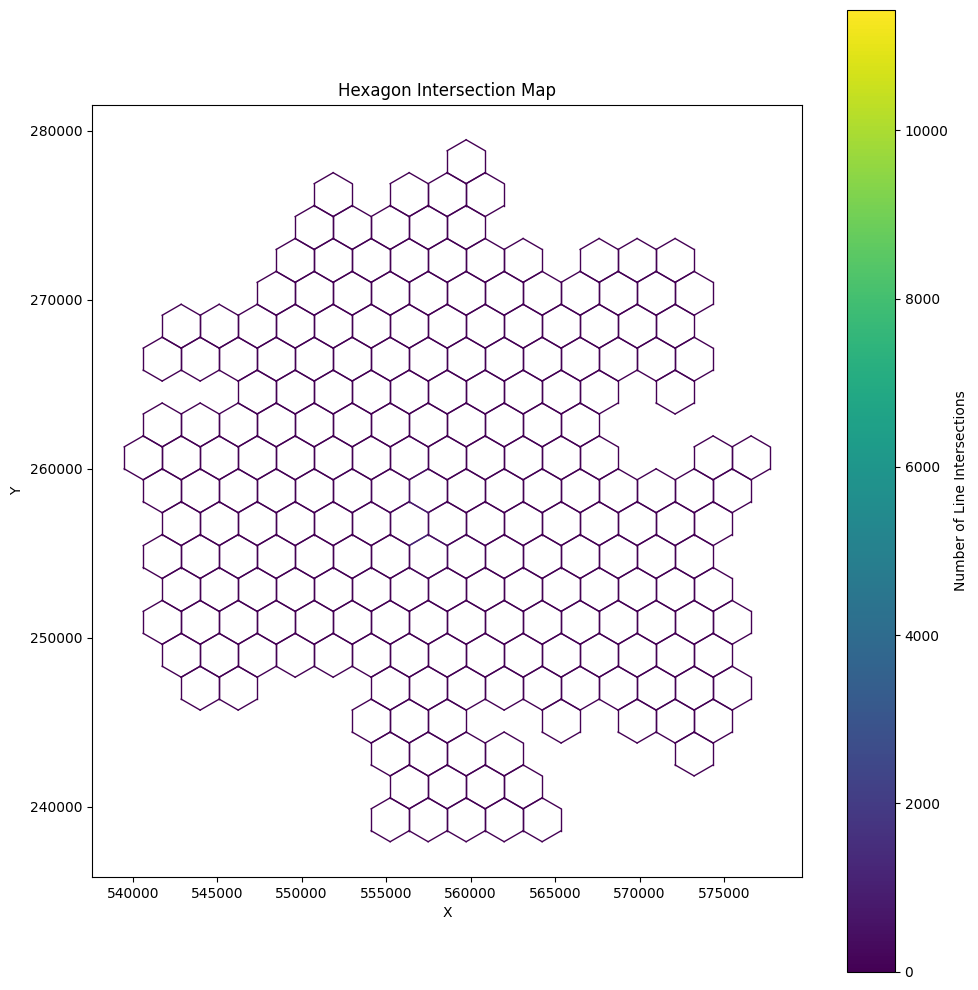

In [5]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Create a colormap
cmap = cmaps['viridis']

# Get the maximum number of intersections
max_intersections = len(intersections)

# Gather plot data
plot_data = []
for hex_coords in hexagon:
    hex_coords.append(hex_coords[0])  # Close the polygon
    xs, ys = zip(*hex_coords)
    
    for i in range(len(hex_coords) - 1):
        p1 = hex_coords[i]
        p2 = hex_coords[i + 1]
        
        # Find if the segment is in the intersections list
        intersection_count = sum(1 for inter in intersections if 
                                 (tuple(p1), tuple(p2)) in [(inter[0], inter[1]), (inter[1], inter[0])] or 
                                 (tuple(p1), tuple(p2)) in [(inter[2], inter[3]), (inter[3], inter[2])])
        
        plot_data.append(((xs[i], xs[i + 1]), (ys[i], ys[i + 1]), intersection_count))

# Plot the hexagon with colored segments
for (x, y, intersection_count) in plot_data:
    ax.plot(x, y, color=cmap(intersection_count / max_intersections), linewidth=1)

# Set the title and axis labels
ax.set_title('Hexagon Intersection Map')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Set equal aspect ratio
ax.set_aspect('equal')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max_intersections))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Number of Line Intersections')

# Display the plot
plt.tight_layout()
plt.show()
